In [ ]:
!pip install PyDrive

In [1]:
import os
import mykeys

project_name = 'CH14_Chains'

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = project_name
os.environ["LANGCHAIN_API_KEY"] = mykeys.get_key('LANG')
os.environ["LANGCHAIN_HUB_API_KEY"] = mykeys.get_key('LANG')
os.environ["OPENAI_API_KEY"] = mykeys.get_key('GPT')
os.environ["GOOGLE_API_KEY"] = mykeys.get_key('GOO')
os.environ["HUGGINGFACEHUB_API_TOKEN"] = mykeys.get_key('HF')
os.environ["UPSTAGE_API_KEY"] = mykeys.get_key('UP')
os.environ["COHERE_API_KEY"] = mykeys.get_key('COH')
os.environ["JINA_API_KEY"] = mykeys.get_key('JINA')
os.environ["ANTHROPIC_API_KEY"] = mykeys.get_key('ANT')

아래 링크를 복사하여 웹 브라우저에 붙여넣으세요.
https://accounts.google.com/o/oauth2/auth?client_id=35726703810-4v13dfqmilhgv6shlc3cv9i3ktuh73j1.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code
Authentication successful.


In [2]:
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith(project_name)

LangSmith 추적을 시작합니다.
[프로젝트명]
CH14_Chains


In [ ]:
from langchain_teddynote import logging

# set_enable=False 로 지정하면 추적을 하지 않습니다.
logging.langsmith(project_name, set_enable=False)

CH14 체인(Chains)

01. 문서 요약

In [3]:
from langchain_community.document_loaders import TextLoader

# 뉴스데이터 로드
loader = TextLoader("./news.txt")
docs = loader.load()
print(f"총 글자수: {len(docs[0].page_content)}")
print("\n========= 앞부분 미리보기 =========\n")
print(docs[0].page_content[:500])


총 글자수: 1708

========= 앞부분 미리보기 =========

제목: 
AI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 


In [4]:
from langchain import hub

prompt = hub.pull("teddynote/summary-stuff-documents-korean")
prompt.pretty_print()


Please summarize the sentence according to the following REQUEST.
REQUEST:
1. Summarize the main points in bullet points in KOREAN.
2. Each summarized sentence must start with an emoji that fits the meaning of the each sentence.
3. Use various emojis to make the summary more interesting.
4. Translate the summary into KOREAN if it is written in ENGLISH.
5. DO NOT translate any technical terms.
6. DO NOT include any unnecessary information.

CONTEXT:
{context}

SUMMARY:"



In [5]:
from langchain_openai import ChatOpenAI
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_teddynote.callbacks import StreamingCallback


llm = ChatOpenAI(
    model_name="gpt-4.1",
    streaming=True,
    temperature=0,
    callbacks=[StreamingCallback()],
)


stuff_chain = create_stuff_documents_chain(llm, prompt)
answer = stuff_chain.invoke({"context": docs})


- 🆓 AI2가 완전한 오픈 소스 LLM '올모(OLMo)'를 출시함.
- 🔍 데이터 수집, 학습, 배포 전 과정을 투명하게 공개함.
- 💼 아파치 2.0 라이선스로 상업적 활용에 제한이 없음.
- 🛠️ 모델 코드, 모델 가중치, 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷을 모두 제공함.
- 📊 70억 매개변수의 '올모 7B' 등 다양한 변형 모델과 10억 매개변수의 '올모 1B' 모델을 포함함.
- 📚 AI2의 '돌마(Dolma)' 데이터 세트를 기반으로 구축됨.
- 📝 추론 코드, 훈련 지표, 훈련 로그, 전체 모델 가중치, 평가 제품군 등도 포함됨.
- 🏆 일부 자연어 처리 벤치마크에서 메타의 '라마', TII의 '팰컨'보다 뛰어난 성능을 보임.
- ⚠️ 비영어권 언어 품질과 코드 생성 기능이 약하다는 제약이 있음.
- 🔄 AI2는 다양한 모델 크기와 데이터 세트로 올모를 계속 발전시킬 계획임.
- 🧑‍🔬 올모 출시는 AI 모델에 대한 깊은 이해를 위한 기반을 마련함.
- 🌐 모든 리소스는 깃허브와 허깅페이스에서 무료로 제공됨.

In [6]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()
docs = docs[3:8]  # 여기서 문서의 일부만 요약
print(f"총 페이지수: {len(docs)}")


총 페이지수: 5


In [7]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-4.1",
)

# map prompt 다운로드
map_prompt = hub.pull("teddynote/map-prompt")

# 프롬프트 출력
map_prompt.pretty_print()


================================ System Message ================================

You are a professional main thesis extractor.

================================ Human Message =================================

Your task is to extract main thesis from given documents. Answer should be in same language as given document. 

#Format: 
- thesis 1
- thesis 2
- thesis 3
- ...

Here is a given document: 
{doc}

Write 1~5 sentences.
#Answer:


In [8]:
# map chain 생성
map_chain = map_prompt | llm | StrOutputParser()


In [9]:
# 문서에 대한 주요내용 추출
doc_summaries = map_chain.batch(docs)


In [10]:
# 요약된 문서의 수 출력
len(doc_summaries)


5

In [11]:
# 일부 문서의 요약 출력
print(doc_summaries[0])


- 미국 바이든 대통령은 안전하고 신뢰할 수 있는 AI 개발과 사용을 보장하기 위한 행정명령을 발표하였다.
- 해당 행정명령은 AI의 안전·보안 기준 마련, 개인정보보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제협력 등 광범위한 내용을 포함한다.
- 강력한 AI 시스템 개발 기업에 대한 안전성 테스트 결과 공유, AI 생성 콘텐츠 표시 기준 마련 등 안전성과 신뢰성 확보를 위한 구체적 조치가 제시되었다.
- AI의 무책임한 사용으로 인한 차별과 편견 방지, 소비자 보호, 근로자 지원, AI 연구 인프라 확충 및 인재 유치 등 사회 전반에 걸친 AI 활용의 책임성과 혁신을 동시에 추구한다.


In [12]:
# reduce prompt 다운로드
reduce_prompt = hub.pull("teddynote/reduce-prompt")

# 프롬프트 출력
reduce_prompt.pretty_print()


================================ System Message ================================

You are a professional summarizer. You are given a list of summaries of documents and you are asked to create a single summary of the documents.

================================ Human Message =================================

#Instructions: 
1. Extract main points from a list of summaries of documents
2. Make final summaries in bullet points format.
3. Answer should be written in {language}.

#Format: 
- summary 1
- summary 2
- summary 3
- ...

Here is a list of summaries of documents: 
{doc_summaries}

#SUMMARY:


In [13]:
# reduce chain 생성
reduce_chain = reduce_prompt | llm | StrOutputParser()


In [14]:
from langchain_teddynote.messages import stream_response

answer = reduce_chain.stream({"doc_summaries": doc_summaries, "language": "Korean"})
stream_response(answer)


- 미국 바이든 대통령은 AI의 안전성, 신뢰성, 개인정보보호, 형평성, 소비자 및 노동자 보호, 혁신 촉진, 국제협력 등을 포괄하는 행정명령을 발표하고, AI 개발 기업의 안전성 테스트와 책임성 강화를 강조하였다.
- G7 주요국은 첨단 AI 시스템 개발 기업을 대상으로 위험 평가, 투명성, 책임성, 정보공유, 보안, 콘텐츠 인증 등을 포함한 국제 행동강령에 합의하고, 사회적 위험 완화와 기술 표준 개발, 개인정보 및 지식재산권 보호를 강조하였다.
- 28개국은 영국 AI 안전성 정상회의에서 '블레츨리 선언'을 통해 AI 위험 공동 대응과 이해관계자 협력의 필요성을 확인하고, 각국의 투명성 강화, 안전 테스트, 연구 우선순위 설정, 국제 협력 확대에 합의하였다.
- 미국 법원은 AI 이미지 생성 기업에 대한 예술가들의 저작권 침해 소송에서 저작권 미등록 및 증거 불충분을 이유로 대부분 기각했으나, 일부 저작권 등록 작품에 대한 소송은 계속 진행 중이다.
- 미국 연방거래위원회(FTC)는 생성 AI가 개인정보 침해, 차별, 사기 등 다양한 위험을 초래할 수 있고, 빅테크의 시장 지배력 강화 우려가 있다며, 소비자 보호와 공정 경쟁 유지를 위해 법적 권한을 적극 행사하고 있다.

In [15]:
from langchain_core.runnables import chain


@chain
def map_reduce_chain(docs):
    map_llm = ChatOpenAI(
        temperature=0,
        model_name="gpt-4.1",
    )

    # map prompt 다운로드
    map_prompt = hub.pull("teddynote/map-prompt")

    # map chain 생성
    map_chain = map_prompt | map_llm | StrOutputParser()

    # 첫 번째 프롬프트, ChatOpenAI, 문자열 출력 파서를 연결하여 체인을 생성합니다.
    doc_summaries = map_chain.batch(docs)

    # reduce prompt 다운로드
    reduce_prompt = hub.pull("teddynote/reduce-prompt")
    reduce_llm = ChatOpenAI(
        model_name="gpt-4.1",
        temperature=0,
        callbacks=[StreamingCallback()],
        streaming=True,
    )

    reduce_chain = reduce_prompt | reduce_llm | StrOutputParser()

    return reduce_chain.invoke({"doc_summaries": doc_summaries, "language": "Korean"})


In [16]:
# 결과 출력
answer = map_reduce_chain.invoke(docs)


- 미국 바이든 대통령은 AI의 안전성, 신뢰성, 개인정보 보호, 형평성, 소비자 및 노동자 보호, 혁신 촉진, 국제협력 등을 위한 포괄적 행정명령을 발표하고, AI 개발 기업에 대한 안전성 테스트와 정보공유 의무 등 구체적 조치를 제시하였다.
- G7 주요국은 첨단 AI 시스템 개발 기업을 대상으로 위험 평가, 투명성, 책임성, 정보공유, 보안, 콘텐츠 인증 등을 포함한 국제 행동강령에 합의하고, 사회적 위험 완화와 개인정보·지식재산권 보호, 기술 표준 개발을 추진하기로 하였다.
- 영국 AI 안전성 정상회의에서 28개국이 ‘블레츨리 선언’을 통해 AI 위험 공동 대응과 협력의 필요성을 강조하고, 각국 및 기업이 AI 안전 평가, 테스트 도구 개발, 연구소 설립 등 안전성 강화를 위한 협력에 합의하였다.
- 미국 법원은 AI 이미지 생성 기업에 대한 예술가들의 저작권 침해 소송 중 저작권 미등록 및 증거 불충분 사유로 대부분을 기각했으나, 일부 저작권 등록 작품에 대한 소송은 계속 진행 중이다.
- 미국 연방거래위원회(FTC)는 생성 AI가 개인정보 침해, 차별, 사기 등 소비자와 창작자에게 피해를 줄 수 있고, 빅테크의 시장 지배력 강화 우려가 있다며, AI 관련 불법 행위에 대한 적극적 법적 대응과 소비자 보호, 공정 경쟁 유지를 강조하였다.

In [17]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# map llm 생성
map_llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-4.1",
)

# map chain 생성
map_summary = hub.pull("teddynote/map-summary-prompt")

# 프롬프트 출력
map_summary.pretty_print()


================================ System Message ================================

You are an expert summarizer. Your task is to summarize the following document in {language}.

================================ Human Message =================================

Extract most important main thesis from the documents, then summarize in bullet points.

#Format:
- summary 1
- summary 2
- summary 3
-...

Here is a given document: 
{documents}

Write 1~5 sentences. Think step by step.
#Summary:


In [18]:
# map chain 생성
map_chain = map_summary | llm | StrOutputParser()


In [19]:
# 첫 번째 문서의 요약 출력
print(map_chain.invoke({"documents": docs[0], "language": "Korean"}))


- 미국 바이든 대통령은 안전하고 신뢰할 수 있는 AI 개발과 사용을 보장하기 위한 행정명령을 발표했다.
- 행정명령은 AI의 안전·보안 기준 마련, 개인정보보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제협력 등을 주요 내용으로 포함한다.
- 강력한 AI 시스템 개발 기업에 안전성 테스트 결과 및 주요 정보 공유를 요구하고, AI 생성 콘텐츠 표시 기준 등 표준과 모범사례를 확립한다.
- AI의 무책임한 사용으로 인한 차별 방지, 의료·교육 분야의 책임 있는 AI 활용, 근로자 보호, 중소기업 및 연구자 지원 등 다양한 정책이 포함된다.
- AI 분야의 국제 경쟁력 강화와 인재 유치를 위해 연구 인프라 확충 및 비자 제도 개선도 추진된다.


In [20]:
# 모든 문서를 입력으로 정의합니다.
input_doc = [{"documents": doc, "language": "Korean"} for doc in docs]


In [21]:
# 모든 문서에 대한 요약본을 출력합니다.
print(map_chain.batch(input_doc))


['- 미국 바이든 대통령은 안전하고 신뢰할 수 있는 AI 개발과 사용을 보장하기 위한 행정명령을 발표했다.\n- 행정명령은 AI의 안전·보안 기준 마련, 개인정보 보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제협력 등을 주요 내용으로 포함한다.\n- 강력한 AI 시스템 개발 기업에 안전성 테스트 결과 및 주요 정보 공유를 요구하고, AI 생성 콘텐츠 표시 기준 등 표준과 모범사례를 확립한다.\n- AI로 인한 차별 방지, 책임 있는 AI 활용, 근로자 보호, AI 연구 인프라 확충 및 인재 유치 등 다양한 정책적 지원이 추진된다.\n- 이를 통해 미국은 AI의 책임 있는 활용과 글로벌 경쟁력 강화를 동시에 도모하고자 한다.', '- G7 주요 7개국은 첨단 AI 시스템 개발 기업을 대상으로 위험 식별과 완화를 위한 국제 행동강령에 합의하였다.\n- 이 행동강령은 AI 수명주기 전반에 걸친 위험 평가, 투명성 및 책임성 보장, 정보공유와 협력, 보안 통제, 콘텐츠 인증 및 출처 확인 등을 요구한다.\n- 행동강령은 기업의 자발적 채택을 권고하며, 기술 발전에 따라 이해관계자 협의를 통해 지속적으로 개정될 예정이다.\n- AI 시스템의 안전성, 사회적 위험 완화, 개인정보 및 지식재산권 보호, 국제 기술 표준 개발 등이 강조된다.', '- 28개국이 영국에서 열린 AI 안전성 정상회의에서 AI 위험에 공동 대응하기 위한 ‘블레츨리 선언’을 발표했다.\n- 선언문은 국가, 기업, 국제기구, 시민사회, 학계 등 모든 이해관계자의 협력과 첨단 AI 개발 기업의 안전 책임을 강조했다.\n- 각국은 AI 시스템의 안전 테스트, 투명성 강화, 공공부문 역량 구축, 과학 연구개발 등에서 협력하기로 합의했다.\n- 영국은 정부 주도의 AI 안전 연구소를 설립해 첨단 AI 모델의 안전성 시험을 주도할 계획이다.\n- 한국은 영국과 6개월 뒤 온라인 미니 정상회의, 프랑스와는 1년 후 대면 정상회의를 개최하기로 했다.', '- 미국 캘리포니아 

In [22]:
# refine prompt 다운로드
refine_prompt = hub.pull("teddynote/refine-prompt")

# 프롬프트 출력
refine_prompt.pretty_print()


================================ System Message ================================

You are an expert summarizer.

================================ Human Message =================================

Your job is to produce a final summary

We have provided an existing summary up to a certain point:
{previous_summary}

We have the opportunity to refine the existing summary(only if needed) with some more context below.
------------
{current_summary}
------------
Given the new context, refine the original summary in {language}.
If the context isn't useful, return the original summary.


In [23]:
# refine llm 생성
refine_llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-4.1",
)

# refine chain 생성
refine_chain = refine_prompt | refine_llm | StrOutputParser()


In [24]:
from langchain_core.runnables import chain


@chain
def map_refine_chain(docs):

    # map chain 생성
    map_summary = hub.pull("teddynote/map-summary-prompt")

    map_chain = (
        map_summary
        | ChatOpenAI(
            model_name="gpt-4.1",
            temperature=0,
        )
        | StrOutputParser()
    )

    input_doc = [{"documents": doc.page_content, "language": "Korean"} for doc in docs]

    # 첫 번째 프롬프트, ChatOpenAI, 문자열 출력 파서를 연결하여 체인을 생성합니다.
    doc_summaries = map_chain.batch(input_doc)

    refine_prompt = hub.pull("teddynote/refine-prompt")

    refine_llm = ChatOpenAI(
        model_name="gpt-4.1",
        temperature=0,
        callbacks=[StreamingCallback()],
        streaming=True,
    )

    refine_chain = refine_prompt | refine_llm | StrOutputParser()

    previous_summary = doc_summaries[0]

    for current_summary in doc_summaries[1:]:

        previous_summary = refine_chain.invoke(
            {
                "previous_summary": previous_summary,
                "current_summary": current_summary,
                "language": "Korean",
            }
        )
        print("\n\n-----------------\n\n")

    return previous_summary


In [25]:
refined_summary = map_refine_chain.invoke(docs)


미국 바이든 대통령은 안전하고 신뢰할 수 있는 AI 개발과 사용을 위한 행정명령에 서명하여, AI의 안전·보안 기준 마련, 개인정보보호, 형평성 및 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제협력 등을 포괄적으로 규정했다. 강력한 AI 시스템 개발 기업에 안전성 테스트 결과와 주요 정보 공유를 요구하고, AI 안전성·신뢰성 표준 및 생성 콘텐츠 표시 기준을 마련한다. AI의 무책임한 사용으로 인한 차별과 편견 방지, 소비자 보호, 근로자 지원, 의료·교육 분야의 책임 있는 AI 활용, 노동자 피해 완화 등 사회적 책임을 강조한다. 국가 AI 연구 인프라 확충과 중소기업·개발자 지원, AI 분야 외국인 인재 유치 등 혁신과 경쟁력 강화를 위한 정책도 포함된다.

아울러, G7 주요 7개국은 첨단 AI 시스템 개발 기업을 대상으로 위험 식별과 완화를 위한 국제 행동강령에 합의했다. 이 행동강령은 AI 수명주기 전반의 위험 평가, 투명성·책임성 강화, 정보공유 및 협력, 보안 통제, 콘텐츠 인증 등 다양한 조치를 포함하며, 기업의 자발적 채택을 권고하고 기술 발전에 따라 지속적으로 개정될 예정이다. AI의 사회적 위험과 안전 문제 완화, 국제 표준 개발, 개인정보 및 지식재산권 보호 등도 주요 내용으로 다뤄졌다.

-----------------


미국 바이든 대통령은 안전하고 신뢰할 수 있는 AI 개발과 사용을 위한 행정명령에 서명하여, AI의 안전·보안 기준 마련, 개인정보보호, 형평성 및 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제협력 등을 포괄적으로 규정했다. 강력한 AI 시스템 개발 기업에 안전성 테스트 결과와 주요 정보 공유를 요구하고, AI 안전성·신뢰성 표준 및 생성 콘텐츠 표시 기준을 마련한다. AI의 무책임한 사용으로 인한 차별과 편견 방지, 소비자 보호, 근로자 지원, 의료·교육 분야의 책임 있는 AI 활용, 노동자 피해 완화 등 사회적 책임을 강조한다. 국가 AI 연구 인프라 확충과 중소기업·개발

In [27]:
import textwrap
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import SimpleJsonOutputParser

# {content}를 제외한 모든 입력에 대한 기본값 지정
cod_chain_inputs = {
    "content": lambda d: d.get("content"),
    "content_category": lambda d: d.get("content_category", "Article"),
    "entity_range": lambda d: d.get("entity_range", "1-3"),
    "max_words": lambda d: int(d.get("max_words", 80)),
    "iterations": lambda d: int(d.get("iterations", 5)),
}

# Chain of Density 프롬프트 다운로드
cod_prompt = hub.pull("teddynote/chain-of-density-prompt")

# Chain of Density 체인 생성
cod_chain = (
    cod_chain_inputs
    | cod_prompt
    | ChatOpenAI(temperature=0, model="gpt-4.1")
    | SimpleJsonOutputParser()
)

# 두 번째 체인 생성, 최종 요약만 추출 (스트리밍 불가능, 최종 결과가 필요함)
cod_final_summary_chain = cod_chain | (
    lambda output: output[-1].get(
        "denser_summary", '오류: 마지막 딕셔너리에 "denser_summary" 키가 없습니다'
    )
)


In [28]:
content = docs[1].page_content
print(content)


SPRi AI Brief |  
2023-12 월호
2G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의
nG7이 첨단 AI 시스템을 개발하는 기업을 대상으로 AI 위험 식별과 완화를 위해 자발적인 
채택을 권고하는 AI 국제 행동강령을 마련
n행동강령은 AI 수명주기 전반에 걸친 위험 평가와 완화, 투명성과 책임성의 보장, 정보공유와 
이해관계자 간 협력, 보안 통제, 콘텐츠 인증과 출처 확인 등의 조치를 요구KEY Contents
£G7, 첨단 AI 시스템의 위험 관리를 위한 국제 행동강령 마련
n주요 7개국(G7)* 은 2023 년 10월 30일 ‘히로시마 AI 프로세스 ’를 통해 AI 기업 대상의 AI 국제 
행동강령 (International Code of Conduct for Advanced AI Systems) 에 합의
∙G7은 2023 년 5월 일본 히로시마에서 개최된 정상회의에서 생성 AI에 관한 국제규범 마련과 
정보공유를 위해 ‘히로시마 AI 프로세스 ’를 출범**
∙기업의 자발적 채택을 위해 마련된 이번 행동강령은 기반모델과 생성 AI를 포함한 첨단 AI 시스템의 
위험 식별과 완화에 필요한 조치를 포함
* 주요 7개국(G7)은 미국, 일본, 독일, 영국, 프랑스 , 이탈리아 , 캐나다를 의미
** 5월 정상회의에는 한국, 호주, 베트남 등을 포함한 8개국이 초청을 받았으나 , AI 국제 행동강령에는 우선 G7 국가만 포함하여 채택
nG7은 행동강령을 통해 아래의 조치를 제시했으며 , 빠르게 발전하는 기술에 대응할 수 있도록 
이해관계자 협의를 통해 필요에 따라 개정할 예정
∙첨단 AI 시스템의 개발 과정에서 AI 수명주기 전반에 걸쳐 위험을 평가 및 완화하는 조치를 채택하고 , 
첨단 AI 시스템의 출시와 배포 이후 취약점과 오용 사고, 오용 유형을 파악해 완화
∙첨단 AI 시스템의 성능과 한계를 공개하고 적절하거나 부적절한 사용영역을 알리는 방법으로 투명성을 
보장하고 책임성을 강화
∙산업계 , 정부, 시민사회 

In [29]:
# 결과를 저장할 빈 리스트 초기화
results: list[dict[str, str]] = []

# cod_chain을 스트리밍 모드로 실행하고 부분적인 JSON 결과를 처리
for partial_json in cod_chain.stream(
    {"content": content, "content_category": "Article"}
):
    # 각 반복마다 results를 업데이트
    results = partial_json

    # 현재 결과를 같은 줄에 출력 (캐리지 리턴을 사용하여 이전 출력을 덮어씀)
    print(results, end="\r", flush=True)

# 총 요약 수 계산
total_summaries = len(results)
print("\n")

# 각 요약을 순회하며 처리
i = 1
for cod in results:
    # 누락된 엔티티들을 추출하고 포맷팅
    added_entities = ", ".join(
        [
            ent.strip()
            for ent in cod.get(
                "missing_entities", 'ERR: "missing_entiies" key not found'
            ).split(";")
        ]
    )
    # 더 밀도 있는 요약 추출
    summary = cod.get("denser_summary", 'ERR: missing key "denser_summary"')

    # 요약 정보 출력 (번호, 총 개수, 추가된 엔티티)
    print(
        f"### CoD Summary {i}/{total_summaries}, 추가된 엔티티(entity): {added_entities}"
        + "\n"
    )
    # 요약 내용을 80자 너비로 줄바꿈하여 출력
    print(textwrap.fill(summary, width=80) + "\n")
    i += 1

print("\n============== [최종 요약] =================\n")
print(summary)


[{'missing_entities': '히로시마 AI 프로세스;AI 국제 행동강령', 'denser_summary': 'This summary covers the recent developments involving the 히로시마 AI 프로세스 and the AI 국제 행동강령, which are significant topics discussed in the article. The article provides an overview of these initiatives, their background, and their implications for AI companies and international cooperation, highlighting the importance of these entities in the context of AI governance and risk management at the global level.'}, {'missing_entities': '주요 7개국(G7)', 'denser_summary': 'The 히로시마 AI 프로세스 led to the AI 국제 행동강령, agreed upon by 주요 7개국(G7), focusing on AI governance and risk management. The article details how these G7 nations are spearheading international cooperation, outlining the significance of these entities and their roles in shaping responsible AI development and oversight at a global scale.'}, {'missing_entities': '생성 AI;위험 평가와 완화', 'denser_summary': 'The 히로시마 AI 프로세스 resulted in the AI 국제 행동강령, adopted by 주요 7개국(G7), targe

In [30]:
print(summary)


The 히로시마 AI 프로세스 produced the AI 국제 행동강령, adopted by 주요 7개국(G7), addressing 생성 AI, 위험 평가와 완화, 투명성, 책임성, 정보공유, 보안 통제, 콘텐츠 인증, 출처 확인, 사회적 위험 완화, 기후 위기 대응, and 국제 기술 표준, ensuring responsible, secure, and globally standardized advanced AI development and deployment.


In [31]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()
len(docs)


23

In [32]:
# 하나의 Text 로 모든 문서를 연결합니다.
texts = "\n\n".join([doc.page_content for doc in docs])
len(texts)


27977

In [33]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
split_docs = text_splitter.split_text(texts)


In [34]:
# 총 문서의 수 확인
len(split_docs)


79

In [35]:
from langchain_upstage import UpstageEmbeddings

embeddings = UpstageEmbeddings(model="solar-embedding-1-large-passage")

vectors = embeddings.embed_documents(split_docs)


In [36]:
from sklearn.cluster import KMeans

# 클러스터 수를 선택하면 문서의 콘텐츠에 따라 조정할 수 있습니다.
num_clusters = 10

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=123).fit(vectors)


In [37]:
# 결과 확인
kmeans.labels_


array([5, 3, 7, 6, 4, 4, 4, 5, 3, 8, 8, 8, 1, 1, 8, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 8, 8, 8, 8, 2, 2, 2, 2, 9, 9, 9, 3,
       9, 9, 9, 6, 6, 6, 6, 5, 5, 5, 5, 0, 0, 0, 0, 4, 4, 4, 8, 8, 8, 8,
       4, 8, 4, 9, 4, 4, 9, 6, 2, 5, 4, 4, 4], dtype=int32)

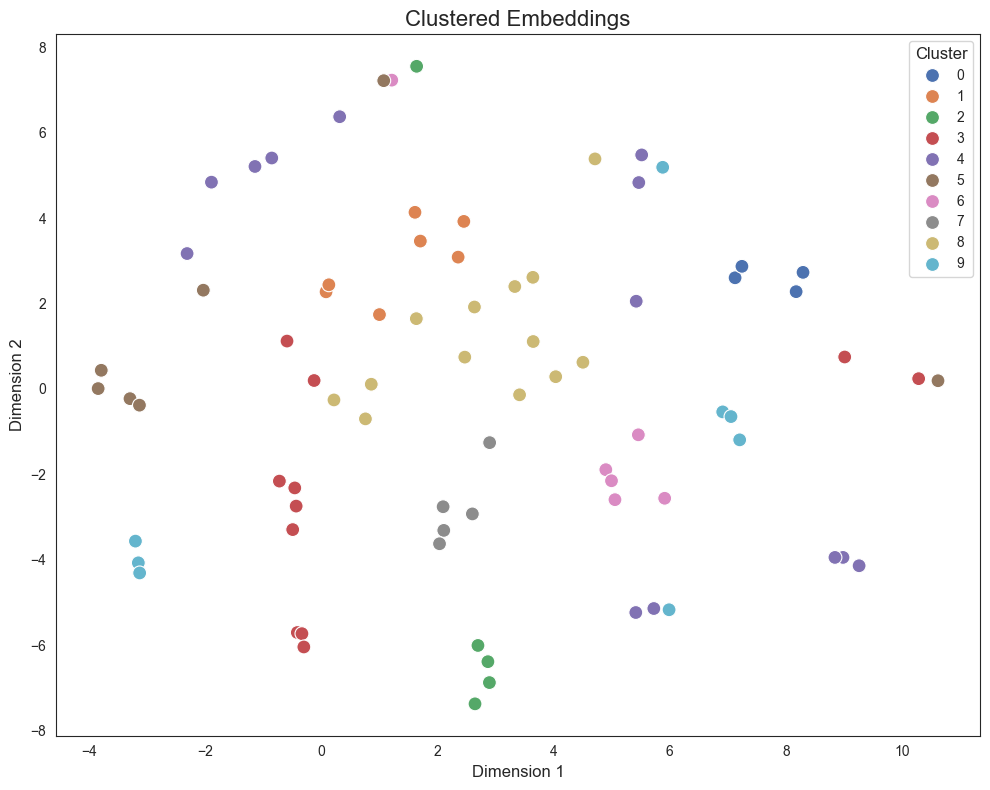

In [38]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 경고 제거
import warnings

warnings.filterwarnings("ignore")

# t-SNE 수행 및 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(np.array(vectors))

# seaborn 스타일 설정
sns.set_style("white")

# 축소된 데이터 플롯
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_data_tsne[:, 0],
    y=reduced_data_tsne[:, 1],
    hue=kmeans.labels_,
    palette="deep",
    s=100,
)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.title("Clustered Embeddings", fontsize=16)
plt.legend(title="Cluster", title_fontsize=12)

# 배경색 설정
plt.gcf().patch.set_facecolor("white")

plt.tight_layout()
plt.show()


In [39]:
import numpy as np

# 가장 가까운 점들을 저장할 빈 리스트 생성
closest_indices = []

# 클러스터 수만큼 반복
for i in range(num_clusters):

    # 해당 클러스터 중심으로부터의 거리 목록 구하기
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # 가장 가까운 점의 인덱스 찾기 (argmin을 사용하여 최소 거리 찾기)
    closest_index = np.argmin(distances)

    # 해당 인덱스를 가장 가까운 인덱스 리스트에 추가
    closest_indices.append(closest_index)


In [40]:
# 문서의 요약을 순서대로 진행하기 위하여 오름차순 정렬
selected_indices = sorted(closest_indices)
selected_indices


[np.int64(4),
 np.int64(16),
 np.int64(24),
 np.int64(28),
 np.int64(34),
 np.int64(37),
 np.int64(41),
 np.int64(47),
 np.int64(51),
 np.int64(55)]

In [41]:
from langchain_core.documents import Document

selected_docs = [Document(page_content=split_docs[doc]) for doc in selected_indices]
selected_docs


[Document(metadata={}, page_content='▹ 빌 게이츠, AI 에이전트로 인한 컴퓨터 사용의 패러다임 변화 전망································ 13\n   ▹ 유튜브, 2024년부터 AI 생성 콘텐츠 표시 의무화···························································· 14\n 3. 기술/연구\n   ▹ 영국 과학혁신기술부, AI 안전 연구소 설립 발표······························································ 15\n   ▹ 구글 딥마인드, 범용 AI 모델의 기능과 동작에 대한 분류 체계 발표······························ 16\n   ▹ 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수 ··········································· 17\n   \n 4. 인력/교육'),
 Document(metadata={}, page_content='1. 정책/법제  \n2. 기업/산업 \n3. 기술/연구 \n 4. 인력/교육\n영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언\nn 영국 블레츨리 파크에서 개최된 AI 안전성 정상회의에 참가한 28개국들이 AI 안전 보장을 \n위한 협력 방안을 담은 블레츨리 선언을 발표\nn 첨단 AI를 개발하는 국가와 기업들은 AI 시스템에 대한 안전 테스트 계획에 합의했으며, \n영국의 AI 안전 연구소가 전 세계 국가와 협력해 테스트를 주도할 예정 \nKEY Contents\n£ AI 안전성 정상회의 참가국들, 블레츨리 선언 통해 AI 안전 보장을 위한 협력에 합의\nn 2023년 11월 1~2일 영국 블레츨리 파크에서 열린 AI 안전성 정상회의(AI Safety Summit)에 \n참가한 28개국 대표들이 AI 위험 관리를 위한 ‘블레츨리 선언’을 발표 \n∙선언은 AI 안전 보장을 위해 

In [42]:
# 이전에 생성한 map_refine_chain을 사용하여 요약 생성
refined_summary = map_refine_chain.invoke(selected_docs)


- 빌 게이츠는 AI 에이전트의 등장으로 컴퓨터 사용 방식에 근본적인 변화가 올 것이라고 전망했다.
- 유튜브는 2024년부터 AI가 생성한 콘텐츠임을 반드시 표시하도록 의무화할 예정이다.
- 영국 정부는 AI의 안전성을 연구하기 위한 AI 안전 연구소 설립을 발표했다.
- 구글 딥마인드는 범용 AI 모델의 기능과 동작을 분류하는 새로운 체계를 공개했다.
- 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수한 성능을 보였다.
- 28개국이 영국에서 열린 AI 안전성 정상회의에서 AI 위험에 공동 대응하기 위한 ‘블레츨리 선언’을 발표했다.
- 선언을 통해 국가, 국제기구, 기업, 시민사회, 학계 등 모든 이해관계자의 협력 필요성이 강조되었으며, 첨단 AI 개발 국가와 기업들은 AI 시스템의 안전 테스트 계획에 합의했고, 영국 AI 안전 연구소가 글로벌 테스트를 주도할 예정이다.

-----------------


- 빌 게이츠는 AI 에이전트의 등장으로 컴퓨터 사용 방식에 근본적인 변화가 올 것이라고 전망했다.
- 유튜브는 2024년부터 AI가 생성한 콘텐츠임을 반드시 표시하도록 의무화할 예정이다.
- 영국 정부는 AI의 안전성을 연구하기 위한 AI 안전 연구소 설립을 발표했다.
- 구글 딥마인드는 범용 AI 모델의 기능과 동작을 분류하는 새로운 체계를 공개했다.
- 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수한 성능을 보였다.
- 28개국이 영국에서 열린 AI 안전성 정상회의에서 AI 위험에 공동 대응하기 위한 ‘블레츨리 선언’을 발표했다.
- 선언을 통해 국가, 국제기구, 기업, 시민사회, 학계 등 모든 이해관계자의 협력 필요성이 강조되었으며, 첨단 AI 개발 국가와 기업들은 AI 시스템의 안전 테스트 계획에 합의했고, 영국 AI 안전 연구소가 글로벌 테스트를 주도할 예정이다.
- 미국 연방거래위원회(FTC)는 생성 AI로 인해 창작자와 소비자가 피해를 입을 수 있고, 일부 빅테크 기업이 AI를 통해 시장 지배력을 강화할 수 있

In [43]:
# 최종 결과 출력
print(refined_summary)


최종 요약(수정본):

- 빌 게이츠는 앞으로 5년 내에 일상언어로 모든 작업을 처리할 수 있는 AI 에이전트가 보급되어 컴퓨터 사용 방식이 완전히 변화할 것이라고 전망했다. 이러한 AI 에이전트는 자연어로 소통하며, 사용자의 정보를 바탕으로 다양한 작업을 자동으로 수행하는 소프트웨어로 정의된다. 이로 인해 의료, 교육, 생산성, 엔터테인먼트, 쇼핑 등 다양한 산업 전반에 큰 영향을 미치고, 기존에 고가로 제공되던 서비스의 대중화를 촉진할 것으로 예상된다.
- 유튜브는 2024년부터 AI가 생성한 콘텐츠임을 반드시 표시하도록 의무화할 예정이다.
- 영국 정부는 AI의 안전성을 연구하기 위한 AI 안전 연구소 설립을 발표했다.
- 구글 딥마인드는 범용 AI 모델의 기능과 동작을 분류하는 새로운 체계를 공개했다.
- 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수한 성능을 보였다.
- 28개국이 영국에서 열린 AI 안전성 정상회의에서 AI 위험에 공동 대응하기 위한 ‘블레츨리 선언’을 발표했다.
- 선언을 통해 국가, 국제기구, 기업, 시민사회, 학계 등 모든 이해관계자의 협력 필요성이 강조되었으며, 첨단 AI 개발 국가와 기업들은 AI 시스템의 안전 테스트 계획에 합의했고, 영국 AI 안전 연구소가 글로벌 테스트를 주도할 예정이다.
- 미국 연방거래위원회(FTC)는 생성 AI로 인해 창작자와 소비자가 피해를 입을 수 있고, 일부 빅테크 기업이 AI를 통해 시장 지배력을 강화할 수 있다는 우려를 표명하며, 저작권청의 AI 관련 질의에 소비자 보호와 경쟁 측면에서 의견서를 제출했다. 저작권청은 생성 AI와 관련된 저작권법 및 정책 이슈를 조사하고 있다.
- EU AI 법 최종 협상에서 프랑스, 이탈리아, 독일이 기반모델 규제에 반대해 협상이 난항을 겪고 있으며, 이들 3개국은 기반모델 개발기업에 자율적 행동강령 도입 및 준수를 의무화하는 방안을 제안했다. 10월 24일 3자 협상 회의에서는 사회적 영향이 큰 강력한 AI 모델에 더 엄격한 규칙을 적용하는

SQL

In [44]:
from langchain_openai import ChatOpenAI
from langchain.chains import create_sql_query_chain
from langchain_community.utilities import SQLDatabase

# SQLite 데이터베이스에 연결합니다.
db = SQLDatabase.from_uri("sqlite:///data/finance.db")

# 데이터베이스의을 출력합니다.
print(db.dialect)

# 사용 가능한 테이블 이름들을 출력합니다.
print(db.get_usable_table_names())


sqlite
['accounts', 'customers', 'transactions']


In [45]:
# model 은 gpt-3.5-turbo 를 지정
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# LLM 과 DB 를 매개변수로 입력하여 chain 을 생성합니다.
chain = create_sql_query_chain(llm, db)


In [46]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    """Given an input question, first create a syntactically correct {dialect} query to run, then look at the results of the query and return the answer. Unless the user specifies in his question a specific number of examples he wishes to obtain, always limit your query to at most {top_k} results. You can order the results by a relevant column to return the most interesting examples in the database.
Use the following format:

Question: "Question here"
SQLQuery: "SQL Query to run"
SQLResult: "Result of the SQLQuery"
Answer: "Final answer here"

Only use the following tables:
{table_info}

Here is the description of the columns in the tables:
`cust`: customer name
`prod`: product name
`trans`: transaction date

Question: {input}"""
).partial(dialect=db.dialect)

# model 은 gpt-3.5-turbo 를 지정
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# LLM 과 DB 를 매개변수로 입력하여 chain 을 생성합니다.
chain = create_sql_query_chain(llm, db, prompt)


In [47]:
# chain 을 실행하고 결과를 출력합니다.
generated_sql_query = chain.invoke({"question": "고객의 이름을 나열하세요"})

# 생성된 쿼리를 출력합니다.
print(generated_sql_query.__repr__())


'SELECT name\nFROM customers'


In [48]:
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

# 생성한 쿼리를 실행하기 위한 도구를 생성합니다.
execute_query = QuerySQLDataBaseTool(db=db)


In [49]:
execute_query.invoke({"query": generated_sql_query})


"[('테디',), ('폴',), ('셜리',), ('민수',), ('지영',), ('은정',)]"

In [50]:
from langchain_community.tools.sql_database.tool import QuerySQLDataBaseTool

# 도구
execute_query = QuerySQLDataBaseTool(db=db)

# SQL 쿼리 생성 체인
write_query = create_sql_query_chain(llm, db)

# 생성한 쿼리를 실행하기 위한 체인을 생성합니다.
chain = write_query | execute_query


In [51]:
# 실행 결과 확인
chain.invoke({"question": "테디의 이메일을 조회하세요"})


"[('teddy@example.com',)]"

In [52]:
from operator import itemgetter
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough

answer_prompt = PromptTemplate.from_template(
    """Given the following user question, corresponding SQL query, and SQL result, answer the user question.

Question: {question}
SQL Query: {query}
SQL Result: {result}
Answer: """
)

answer = answer_prompt | llm | StrOutputParser()

# 생성한 쿼리를 실행하고 결과를 출력하기 위한 체인을 생성합니다.
chain = (
    RunnablePassthrough.assign(query=write_query).assign(
        result=itemgetter("query") | execute_query
    )
    | answer
)


In [53]:
# 실행 결과 확인
chain.invoke({"question": "테디의 transaction 의 합계를 구하세요"})


'테디의 transaction의 합계는 -965.7 입니다.'

In [54]:
from langchain_openai import ChatOpenAI
from langchain_community.utilities import SQLDatabase
from langchain_community.agent_toolkits import create_sql_agent

# model 은 gpt-3.5-turbo 를 지정
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# SQLite 데이터베이스에 연결합니다.
db = SQLDatabase.from_uri("sqlite:///data/finance.db")

# Agent 생성
agent_executor = create_sql_agent(llm, db=db, agent_type="openai-tools", verbose=True)


In [55]:
# 실행 결과 확인
agent_executor.invoke(
    {"input": "테디와 셜리의 transaction 의 합계를 구하고 비교하세요"}
)




> Entering new SQL Agent Executor chain...

Invoking: `sql_db_list_tables` with `{}`


accounts, customers, transactions
Invoking: `sql_db_schema` with `{'table_names': 'transactions'}`



CREATE TABLE transactions (
	transaction_id INTEGER, 
	account_id INTEGER, 
	amount REAL, 
	transaction_date TEXT, 
	PRIMARY KEY (transaction_id), 
	FOREIGN KEY(account_id) REFERENCES accounts (account_id)
)

/*
3 rows from transactions table:
transaction_id	account_id	amount	transaction_date
1	1	74.79	2024-07-13
2	1	-224.1	2024-05-13
3	1	-128.9	2024-01-25
*/
Invoking: `sql_db_query` with `{'query': 'SELECT account_id, SUM(amount) AS total_amount FROM transactions WHERE account_id IN (1, 2) GROUP BY account_id'}`


[(1, -965.7), (2, 743.13)]테디의 거래 합계는 -965.7이고, 셜리의 거래 합계는 743.13입니다.

> Finished chain.


{'input': '테디와 셜리의 transaction 의 합계를 구하고 비교하세요',
 'output': '테디의 거래 합계는 -965.7이고, 셜리의 거래 합계는 743.13입니다.'}

03. 구조화된 출력 체인(with_structered_output)

In [58]:
from langchain.chains.openai_functions import create_structured_output_runnable
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List


class Quiz(BaseModel):
    """4지선다형 퀴즈의 정보를 추출합니다"""

    question: str = Field(..., description="퀴즈의 질문")
    level: str = Field(
        ..., description="퀴즈의 난이도를 나타냅니다. (쉬움, 보통, 어려움)"
    )
    options: List[str] = Field(..., description="퀴즈의 4개의 선택지 입니다.")


llm = ChatOpenAI(model="gpt-4.1", temperature=0.1)
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You're a world-famous quizzer and generates quizzes in structured formats.",
        ),
        (
            "human",
            "TOPIC 에 제시된 내용과 관련한 4지선다형 퀴즈를 출제해 주세요. 만약, 실제 출제된 기출문제가 있다면 비슷한 문제를 만들어 출제하세요."
            "단, 문제에 TOPIC 에 대한 내용이나 정보는 포함하지 마세요. \nTOPIC:\n{topic}",
        ),
        ("human", "Tip: Make sure to answer in the correct format"),
    ]
)

# 구조화된 출력을 위한 모델 생성
llm_with_structured_output = llm.with_structured_output(Quiz)

# 퀴즈 생성 체인 생성
chain = prompt | llm_with_structured_output


In [59]:
# 퀴즈 생성을 요청합니다.
generated_quiz = chain.invoke({"topic": "ADSP(데이터 분석 준전문가) 자격 시험"})


In [60]:
# 생성된 퀴즈 출력
print(f"{generated_quiz.question} (난이도: {generated_quiz.level})\n")
for i, opt in enumerate(generated_quiz.options):
    print(f"{i+1}) {opt}")


다음 중 데이터 분석 과정에서 가장 먼저 수행해야 하는 단계는 무엇인가요? (난이도: 쉬움)

1) 문제 정의
2) 데이터 시각화
3) 모델 평가
4) 결과 해석
